In [2]:
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import os
import glob
from tqdm import tqdm

In [2]:
base_data = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv')
base_data.head(10)

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild
5,11340341,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild
6,11943292,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
7,13317052,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate
8,22191399,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Moderate
9,26342422,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild


In [3]:
description_data = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_series_descriptions.csv')
description_data.head(10)

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1
5,4646740,3666319702,Sagittal T2/STIR
6,7143189,132939515,Sagittal T2/STIR
7,7143189,1951927562,Axial T2
8,7143189,3219733239,Sagittal T1
9,8785691,481125819,Sagittal T2/STIR


In [4]:
coord_data = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_label_coordinates.csv')
coord_data.head(10)

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602
5,4003253,1054713880,4,Right Neural Foraminal Narrowing,L4/L5,187.961759,251.839388
6,4003253,1054713880,4,Right Neural Foraminal Narrowing,L5/S1,198.240918,285.613767
7,4003253,1054713880,5,Right Neural Foraminal Narrowing,L3/L4,187.227533,210.722753
8,4003253,1054713880,6,Right Neural Foraminal Narrowing,L1/L2,194.569790,127.755258
9,4003253,1054713880,6,Right Neural Foraminal Narrowing,L2/L3,191.632887,165.934990


In [3]:
pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/test_series_descriptions.csv')

,study_id,series_id,series_description
0,44036939,2828203845,Sagittal T1
1,44036939,3481971518,Axial T2
2,44036939,3844393089,Sagittal T2/STIR


DICOM File Metadata:
(0008, 0018): SOP Instance UID = 1009905322.1.5
(0008, 0023): Content Date = 20240503
(0008, 0033): Content Time = 223751.989806
(0008, 103e): Series Description = T2
(0010, 0020): Patient ID = 1009905322
(0018, 0050): Slice Thickness = 5
(0018, 0088): Spacing Between Slices = 6
(0018, 5100): Patient Position = HFS
(0020, 000d): Study Instance UID = 1009905322
(0020, 000e): Series Instance UID = 1009905322.1243755365
(0020, 0013): Instance Number = 5
(0020, 0032): Image Position (Patient) = [15.0146788634778, -104.95574051141, 102.816122377182]
(0020, 0037): Image Orientation (Patient) = [0, 1, 0, 0.03795679286122, 0, -0.9992793798446]
(0020, 0052): Frame of Reference UID = 1.2.826.0.1.3680043.8.498.12681831529434131380892532075082661240
(0020, 1041): Slice Location = 23.9999990134287
(0028, 0002): Samples per Pixel = 1
(0028, 0004): Photometric Interpretation = MONOCHROME2
(0028, 0010): Rows = 224
(0028, 0011): Columns = 224
(0028, 0030): Pixel Spacing = [1.176470

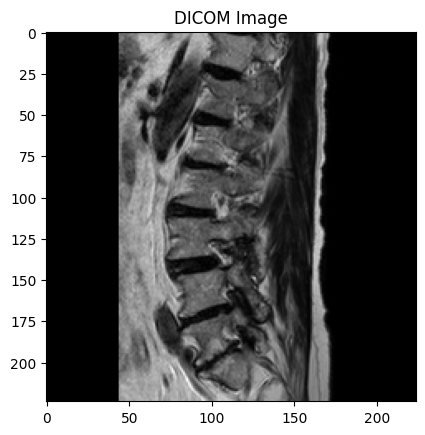

In [13]:
dcm_file_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/1009905322/1243755365/5.dcm'

dcm_data = pydicom.dcmread(dcm_file_path)

print("DICOM File Metadata:")
for elem in dcm_data.iterall():
    if elem.tag != 'PixelData':
        print(f"{elem.tag}: {elem.name} = {elem.value}")


if 'PixelData' in dcm_data:
    plt.imshow(dcm_data.pixel_array, cmap='gray')
    plt.title('DICOM Image')
    plt.show()
else:
    print("No image data found in the DICOM file.")

In [10]:
def count_dcm_files_with_progress(root_dir):
    all_files = glob.glob(os.path.join(root_dir, '**', '*'), recursive=True)
    
    dcm_files = [f for f in all_files if f.endswith('.dcm')]
    
    return len(dcm_files)

path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'

print("Counting .dcm files...")
dcm_count = count_dcm_files_with_progress(path)
print(f"Total .dcm files: {dcm_count}")

Counting .dcm files...
Total .dcm files: 147218


In [4]:
import os
import pydicom
import numpy as np
import pandas as pd
from tqdm import tqdm
import cupy as cp

def process_dicom_files(path):
    data = []
    files = []

    for root, _, filenames in os.walk(path):
        for file in filenames:
            if file.lower().endswith('.dcm'):
                files.append(os.path.join(root, file))

    for filepath in tqdm(files, desc='Processing DICOM files'):
        try:
            dicom_data = pydicom.dcmread(filepath)

            metadata = {
                'Parent Folder': os.path.basename(os.path.dirname(filepath)),
                'Grandparent Folder': os.path.basename(os.path.dirname(os.path.dirname(filepath))),
                'SOP Instance UID': dicom_data.get((0x0008, 0x0018), 'N/A'),
                'Content Date': dicom_data.get((0x0008, 0x0023), 'N/A'),
                'Content Time': dicom_data.get((0x0008, 0x0033), 'N/A'),
                'Series Description': dicom_data.get((0x0008, 0x103e), 'N/A'),
                'Patient ID': dicom_data.get((0x0010, 0x0020), 'N/A'),
                'Slice Thickness': dicom_data.get((0x0018, 0x0050), 'N/A'),
                'Spacing Between Slices': dicom_data.get((0x0018, 0x0088), 'N/A'),
                'Patient Position': dicom_data.get((0x0018, 0x5100), 'N/A'),
                'Study Instance UID': dicom_data.get((0x0020, 0x000d), 'N/A'),
                'Series Instance UID': dicom_data.get((0x0020, 0x000e), 'N/A'),
                'Instance Number': dicom_data.get((0x0020, 0x0013), 'N/A'),
                'Image Position (Patient)': dicom_data.get((0x0020, 0x0032), 'N/A'),
                'Image Orientation (Patient)': dicom_data.get((0x0020, 0x0037), 'N/A'),
                'Frame of Reference UID': dicom_data.get((0x0020, 0x0052), 'N/A'),
                'Slice Location': dicom_data.get((0x0020, 0x1041), 'N/A'),
                'Samples per Pixel': dicom_data.get((0x0028, 0x0002), 'N/A'),
                'Photometric Interpretation': dicom_data.get((0x0028, 0x0004), 'N/A'),
                'Rows': dicom_data.get((0x0028, 0x0010), 'N/A'),
                'Columns': dicom_data.get((0x0028, 0x0011), 'N/A'),
                'Pixel Spacing': dicom_data.get((0x0028, 0x0030), 'N/A'),
                'Bits Allocated': dicom_data.get((0x0028, 0x0100), 'N/A'),
                'Bits Stored': dicom_data.get((0x0028, 0x0101), 'N/A'),
                'High Bit': dicom_data.get((0x0028, 0x0102), 'N/A'),
                'Pixel Representation': dicom_data.get((0x0028, 0x0103), 'N/A'),
                'Window Center': dicom_data.get((0x0028, 0x1050), 'N/A'),
                'Window Width': dicom_data.get((0x0028, 0x1051), 'N/A'),
                'Rescale Intercept': dicom_data.get((0x0028, 0x1052), 'N/A'),
                'Rescale Slope': dicom_data.get((0x0028, 0x1053), 'N/A'),
                'Rescale Type': dicom_data.get((0x0028, 0x1054), 'N/A'),
            }

            pixel_array = dicom_data.pixel_array
            image_data = cp.array(pixel_array)

            data.append({
                **metadata,
                'Image Data': image_data
            })

        except Exception as e:
            print(f"Error processing file {filepath}: {e}")

    df = pd.DataFrame(data)
    return df

df = process_dicom_files('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images')
df.head()

Processing DICOM files:   0%|          | 67/147218 [00:08<5:20:18,  7.66it/s]


KeyboardInterrupt: 